In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime


# Product 1

In [5]:
pr1 = pd.read_csv("alldata_item1.csv")



In [7]:
pr1["event_date"] = pd.to_datetime(pr1["event_date"], format = "%d/%m/%Y")
pr1['Month'] = pr1['event_date'].dt.month
pr1['Day'] = pr1['event_date'].dt.weekday
pr1.set_index("event_date" , inplace = True)
pr1.drop('Unnamed: 0',
  axis='columns', inplace=True)
pr1.drop(pr1[35:210].index, inplace = True)
pr1.drop(pr1.tail(127).index, inplace = True)

In [8]:
pr1.head()

,price,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber,Day
event_date,,,,,,,,,,,,,,,,
2021-06-24,349.99,48740784,2,104,10,6,1161,8,273179,96190439,8186,20432,Thu,6,25,3
2021-06-23,349.99,48740784,2,94,6,4,1150,9,217812,97696131,7767,15739,Wed,6,25,2
2021-06-22,349.99,48740784,2,104,7,7,844,4,193565,93946117,6182,13761,Tue,6,25,1
2021-06-21,699.98,48740784,2,110,5,4,1024,7,208793,105665153,6331,14491,Mon,6,25,0
2021-06-20,699.98,48740784,1,160,13,8,1098,7,253165,126276503,7475,17062,Sun,6,24,6


<AxesSubplot:xlabel='event_date'>

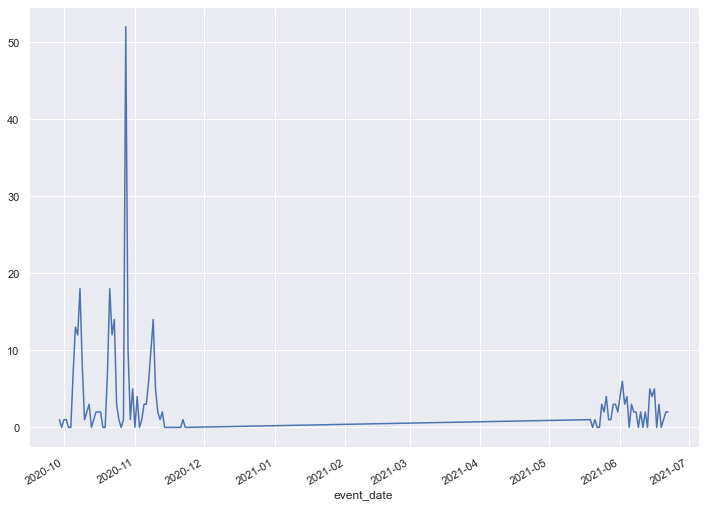

In [132]:
pr1["sold_count"].plot()

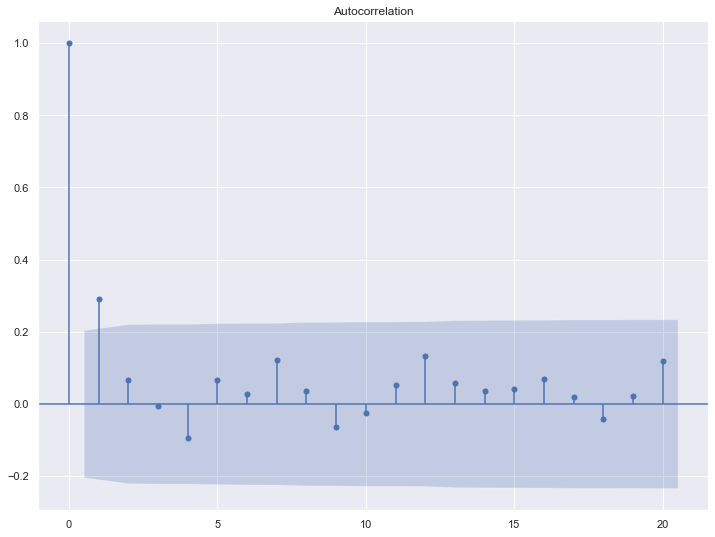

In [133]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pr1["sold_count"])
plt.show()

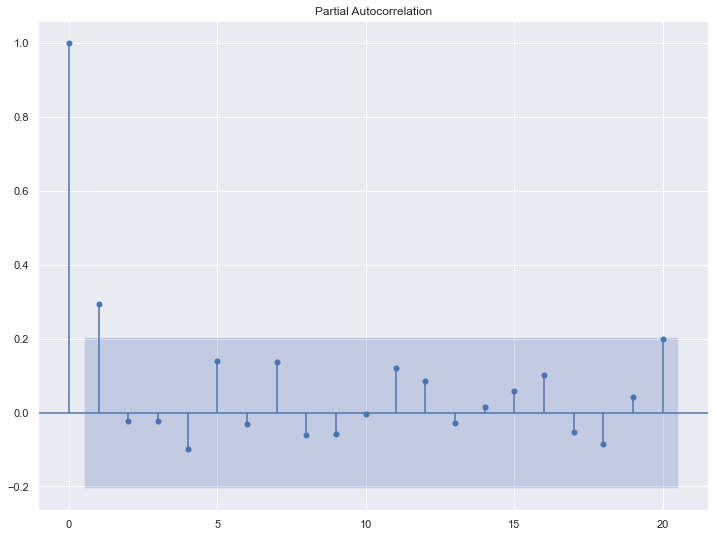

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pr1["sold_count"])
plt.show()

In [15]:
# basket count 
# category sold 
# category visit 
# category favored 
# month 
# week number 

In [9]:
import statsmodels.api as sm
X = pd.DataFrame(pr1["basket_count"])
#X["Category Brand Sold"] = pr1["category_brand_sold"]
#X["category_visit"] = pr1["category_visits"]
X["category_favored"] = pr1["category_favored"]
#X["Visit Count"] = pr1["visit_count"]
#X["favored_count"] = pr1["favored_count"]
#X["Basket Count"] = pr1["basket_count"]
#X["Ty_visits"] = pr1["ty_visits"]
#X["Brand/Category"] = pr1["category_brand_sold"]/pr1["category_sold"]
#X["category_Basket"] = pr1["category_basket"]
X["day_of_week"] = pr1["Day"]
X["Month"] = pr1["Month"]
#X["price"] = pr1["price"]
#X["Season"] = ((pr1["Month"]%12) // 3) + 1
y = pr1["sold_count"]


In [10]:
y

event_date
2021-06-24    2
2021-06-23    2
2021-06-22    2
2021-06-21    2
2021-06-20    1
             ..
2020-10-03    0
2020-10-02    1
2020-10-01    1
2020-09-30    0
2020-09-29    1
Name: sold_count, Length: 94, dtype: int64

In [10]:
X.head()

,basket_count,category_favored,day_of_week,Month
event_date,,,,
2021-06-23,4,15739,2,6
2021-06-22,7,13761,1,6
2021-06-21,4,14491,0,6
2021-06-20,8,17062,6,6
2021-06-19,2,15995,5,6


In [11]:

X = X.astype(float)
X.head()

,basket_count,category_favored,day_of_week,Month
event_date,,,,
2021-06-24,6.0,20432.0,3.0,6.0
2021-06-23,4.0,15739.0,2.0,6.0
2021-06-22,7.0,13761.0,1.0,6.0
2021-06-21,4.0,14491.0,0.0,6.0
2021-06-20,8.0,17062.0,6.0,6.0


In [12]:
lm = sm.OLS(y.astype(float),X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_count   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              189.5
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                    5.97e-43
Time:                        10:53:22   Log-Likelihood:                         -214.58
No. Observations:                  94   AIC:                                      437.2
Df Residuals:                      90   BIC:                                      447.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
basket_count         0.2013      0.009     23.408      0.000       0.184       0.218
category_favored -5.088e-05   7.03e-06     -7.237      0.000   -6.48e-05   -3.69e-05
day_of_week         -0.2504      0.119     -2.112      0.037      -0.486      -0.015
Month                0.2219      0.063      3.534      0.001       0.097       0.347
==============================================================================
Omnibus:                        8.279   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               12.987
Skew:                           0.315   Prob(JB):                      0.00151
Kurtosis:                       4.708   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

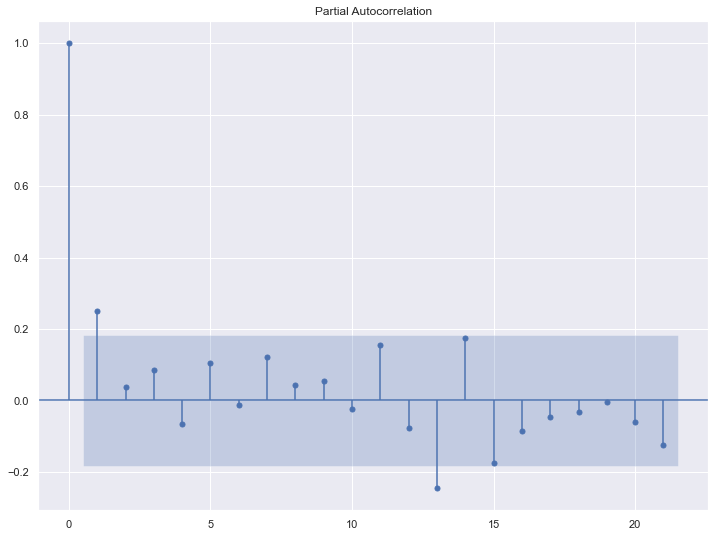

In [225]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(model.resid)
plt.show()

In [15]:
prediction = pd.DataFrame([np.mean(X["basket_count"][:3])])
prediction.columns = ['basket_count']
prediction.set_index(X.head(1).index  , inplace = True)
prediction["category_favored"] = np.mean(X["category_favored"][:3])
prediction["day_of_week"] = int(X["day_of_week"].head(1)) + 1 
prediction["Month"] = int(X['Month'].head(1)) 
prediction

,basket_count,category_favored,day_of_week,Month
event_date,,,,
2021-06-24,5.222222,17605.0,5,6


In [16]:
X = pd.concat([prediction,X])
X

,basket_count,category_favored,day_of_week,Month
event_date,,,,
2021-06-24,5.222222,17605.0,5.0,6.0
2021-06-24,5.666667,16644.0,4.0,6.0
2021-06-24,6.000000,20432.0,3.0,6.0
2021-06-23,4.000000,15739.0,2.0,6.0
2021-06-22,7.000000,13761.0,1.0,6.0
...,...,...,...,...
2020-10-03,0.000000,17169.0,5.0,10.0
2020-10-02,4.000000,16832.0,4.0,10.0
2020-10-01,8.000000,17022.0,3.0,10.0


In [17]:
model.predict(X)

event_date
2021-06-24    0.235635
2021-06-24    0.624388
2021-06-24    0.749161
2021-06-23    0.835596
2021-06-22    1.790646
                ...   
2020-10-03    0.094117
2020-10-02    1.167029
2020-10-01    2.213130
2020-09-30    0.712832
2020-09-29    1.832549
Length: 96, dtype: float64

# Product 2

In [21]:
pr2 = pd.read_csv("alldata_item2.csv")

pr2.head()

,Unnamed: 0,price,event_date,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber
0,NaN,59.99,24/06/2021,73318567,37,8417,795,173,5266,3464,822760,96190439,30131,65204,Thu,Jun,25
1,NaN,59.99,23/06/2021,73318567,40,6870,497,176,5303,3599,804508,97696131,30480,62236,Wed,Jun,25
2,NaN,59.99,22/06/2021,73318567,47,6963,507,244,4434,2974,742698,93946117,28577,58769,Tue,Jun,25
3,NaN,59.99,21/06/2021,73318567,20,6515,531,135,5913,3071,864722,105665153,29990,73041,Mon,Jun,25
4,NaN,63.55,20/06/2021,73318567,15,8673,743,106,7149,3292,1173728,126276503,40550,101322,Sun,Jun,24


In [22]:
pr2["event_date"] = pd.to_datetime(pr2["event_date"], format = "%d/%m/%Y")
pr2['Day'] = pr2['event_date'].dt.weekday
pr2['Month'] = pr2['event_date'].dt.month
pr2.set_index("event_date" , inplace = True)
pr2.drop('Unnamed: 0',
  axis='columns', inplace=True)

#pr2.drop(pr2.tail(382-133).index, inplace=True )



<AxesSubplot:xlabel='event_date'>

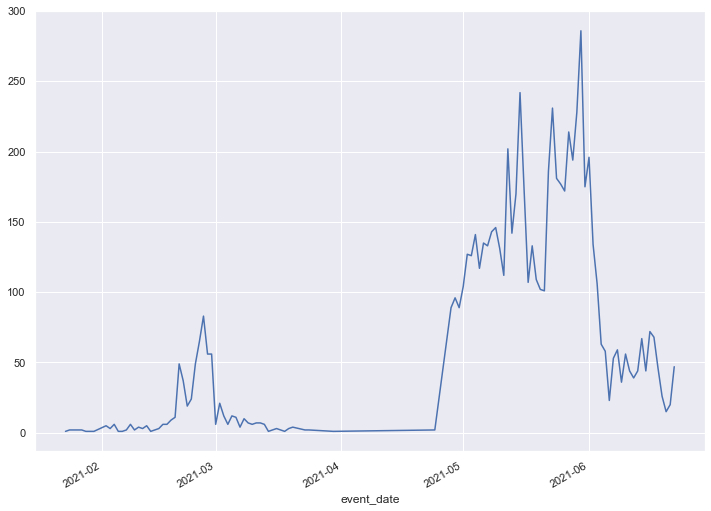

In [143]:
sns.set(rc={'figure.figsize':(12,9)})
pr2.sold_count.plot()

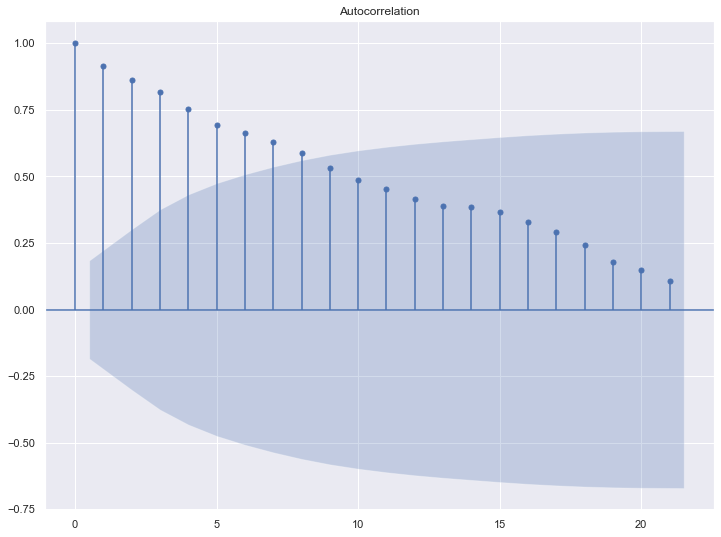

In [144]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pr2["sold_count"])
plt.show()

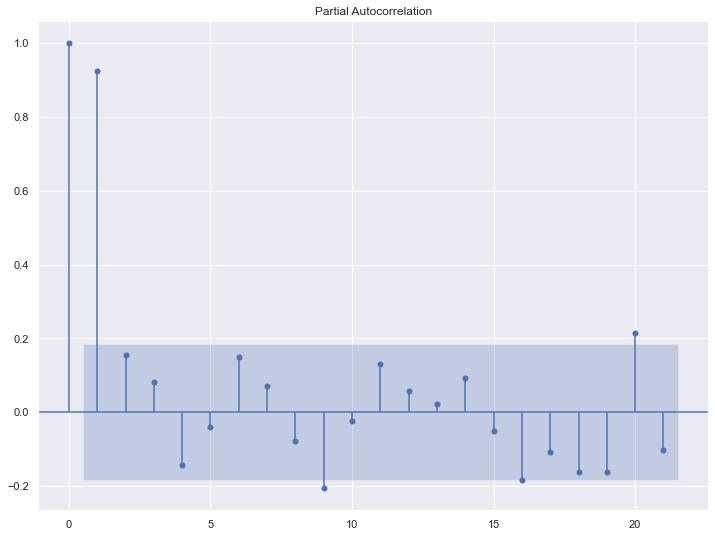

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pr2["sold_count"])
plt.show()

In [23]:
pr2.head()

,price,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber,Day
event_date,,,,,,,,,,,,,,,,
2021-06-23,59.99,73318567,40,6870,497,176,5303,3599,804508,97696131,30480,62236,Wed,6,25,2
2021-06-22,59.99,73318567,47,6963,507,244,4434,2974,742698,93946117,28577,58769,Tue,6,25,1
2021-06-21,59.99,73318567,20,6515,531,135,5913,3071,864722,105665153,29990,73041,Mon,6,25,0
2021-06-20,63.55,73318567,15,8673,743,106,7149,3292,1173728,126276503,40550,101322,Sun,6,24,6
2021-06-19,59.99,73318567,26,5264,396,221,5828,2696,846016,100122365,35232,72651,Sat,6,24,5


In [146]:
#sold_count
#category sold 
# category visits 
# category favored
#visit count 
# favored count
#basket count
#category brand sold 

In [23]:
import statsmodels.api as sm
X = pd.DataFrame(pr2["category_sold"])
#X["Category Visits"] = pr2["category_visits"]
X["category_Favored"] = pr2["category_favored"]
#X["Visit Count"] = pr2["visit_count"]
X["Favored Count"] = pr2["favored_count"]
X["Basket Count"] = pr2["basket_count"]
#X["raito"] = pr2["category_sold"]/pr2["category_favored"]
X["price"] = pr2["price"]
#X["month"] = pr2["Month"]
#X["day"] = pr2["Day"]
#X["ratio"] = pr2["sold_count"]/pr2["favored_count"]
y = pr2["sold_count"]

In [24]:
X["price"].tail(1).fillna(59.99, inplace = True)
X.head()

,category_sold,category_Favored,Favored Count,Basket Count,price
event_date,,,,,
2021-06-24,5266,65204,795,173,59.99
2021-06-23,5303,62236,497,176,59.99
2021-06-22,4434,58769,507,244,59.99
2021-06-21,5913,73041,531,135,59.99
2021-06-20,7149,101322,743,106,63.55


In [25]:
y.head()

event_date
2021-06-24    37
2021-06-23    40
2021-06-22    47
2021-06-21    20
2021-06-20    15
Name: sold_count, dtype: int64

In [26]:
X = X.astype(float)
X.head()

,category_sold,category_Favored,Favored Count,Basket Count,price
event_date,,,,,
2021-06-24,5266.0,65204.0,795.0,173.0,59.99
2021-06-23,5303.0,62236.0,497.0,176.0,59.99
2021-06-22,4434.0,58769.0,507.0,244.0,59.99
2021-06-21,5913.0,73041.0,531.0,135.0,59.99
2021-06-20,7149.0,101322.0,743.0,106.0,63.55


In [27]:
lm = sm.OLS(y.astype(float),X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_count   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1489.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                    2.96e-99
Time:                        10:55:24   Log-Likelihood:                         -442.75
No. Observations:                 115   AIC:                                      895.5
Df Residuals:                     110   BIC:                                      909.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
category_sold        0.0122      0.001      8.546      0.000       0.009       0.015
category_Favored    -0.0008   9.51e-05     -8.296      0.000      -0.001      -0.001
Favored Count       -0.0124      0.002     -6.863      0.000      -0.016      -0.009
Basket Count         0.2327      0.006     39.174      0.000       0.221       0.245
price               -0.0918      0.031     -2.987      0.003      -0.153      -0.031
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.374
Skew:                          -0.124   Prob(JB):                        0.503
Kurtosis:                       3.475   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

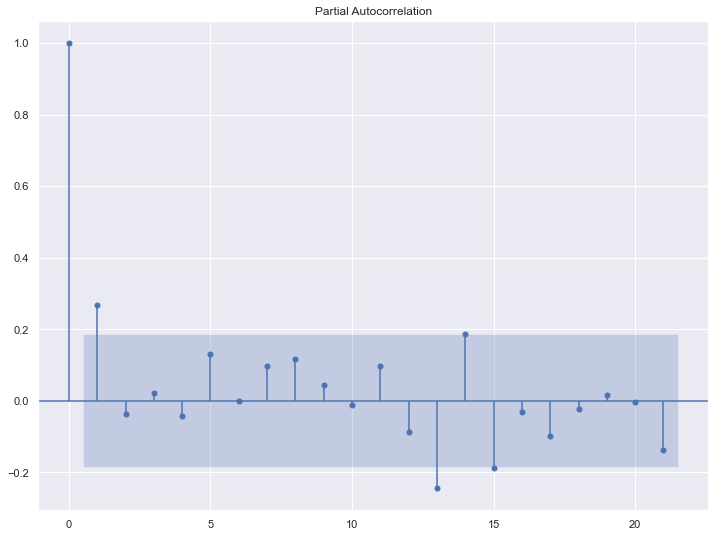

In [281]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(model.resid)
plt.show()

In [30]:
prediction = pd.DataFrame([np.mean(X["category_sold"][:3])])
prediction.columns = ['category_sold']
prediction.set_index(X.head(1).index  , inplace = True)
prediction["category_Favored"] = np.mean(X["category_Favored"][:5])
prediction["Favored Count"] = np.mean(X["Favored Count"][:3])
prediction["Basket Count"] = np.mean(X["Basket Count"][:3])
prediction["price"] = X["price"][0]
#prediction["ratio"] = prediction["category_sold"]/ prediction["category_Favored"]
prediction

,category_sold,category_Favored,Favored Count,Basket Count,price
event_date,,,,,
2021-06-24,5190.0,66272.88,630.555556,182.222222,59.99


In [31]:
X = pd.concat([prediction,X])
X

,category_sold,category_Favored,Favored Count,Basket Count,price
event_date,,,,,
2021-06-24,5190.0,66272.88,630.555556,182.222222,59.99
2021-06-24,5001.0,72114.40,599.666667,197.666667,59.99
2021-06-24,5266.0,65204.00,795.000000,173.000000,59.99
2021-06-23,5303.0,62236.00,497.000000,176.000000,59.99
2021-06-22,4434.0,58769.00,507.000000,244.000000,59.99
...,...,...,...,...,...
2021-01-28,134.0,2167.00,37.000000,2.000000,59.99
2021-01-27,148.0,2601.00,45.000000,7.000000,59.99
2021-01-25,219.0,3427.00,110.000000,13.000000,59.99


In [32]:
model.predict(X)

event_date
2021-06-24    40.041533
2021-06-24    37.104675
2021-06-24    37.625089
2021-06-23    44.814115
2021-06-22    52.659137
                ...    
2021-01-28    -5.578426
2021-01-27    -4.685850
2021-01-25    -3.882235
2021-01-24    -4.937746
2021-01-23    -6.533121
Length: 117, dtype: float64

# Product 3 

In [36]:
pr3 = pd.read_csv("alldata_item3.csv")
pr3.head()

,Unnamed: 0,price,event_date,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber
0,NaN,61.11,24/06/2021,32737302,48,4212,352,237,5266,3464,822760,96190439,30131,65204,Thu,Jun,25
1,NaN,63.07,23/06/2021,32737302,87,4936,375,380,5303,3599,804508,97696131,30480,62236,Wed,Jun,25
2,NaN,61.28,22/06/2021,32737302,84,4443,381,383,4434,2974,742698,93946117,28577,58769,Tue,Jun,25
3,NaN,59.99,21/06/2021,32737302,53,4070,409,274,5913,3071,864722,105665153,29990,73041,Mon,Jun,25
4,NaN,59.99,20/06/2021,32737302,76,5657,510,414,7149,3292,1173728,126276503,40550,101322,Sun,Jun,24


<AxesSubplot:>

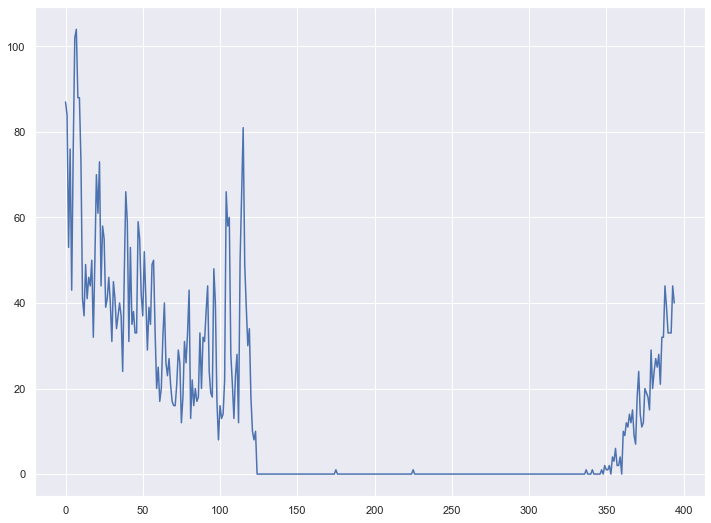

In [62]:
pr3.sold_count.plot()

In [37]:
pr3["event_date"] = pd.to_datetime(pr3["event_date"], format = "%d/%m/%Y")
pr3['Month'] = pr3['event_date'].dt.month
pr3['Day'] = pr3['event_date'].dt.weekday
pr3.set_index("event_date" , inplace = True)
pr3.drop('Unnamed: 0',
  axis='columns', inplace=True)
pr3.drop(pr3.tail(386-116).index, inplace=True )
#pr3["trend"] = 0
pr3.head()


,price,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber,Day,trend
event_date,,,,,,,,,,,,,,,,,
2021-06-24,61.11,32737302,48,4212,352,237,5266,3464,822760,96190439,30131,65204,Thu,6,25,3,0
2021-06-23,63.07,32737302,87,4936,375,380,5303,3599,804508,97696131,30480,62236,Wed,6,25,2,0
2021-06-22,61.28,32737302,84,4443,381,383,4434,2974,742698,93946117,28577,58769,Tue,6,25,1,0
2021-06-21,59.99,32737302,53,4070,409,274,5913,3071,864722,105665153,29990,73041,Mon,6,25,0,0
2021-06-20,59.99,32737302,76,5657,510,414,7149,3292,1173728,126276503,40550,101322,Sun,6,24,6,0


### 

<AxesSubplot:xlabel='event_date'>

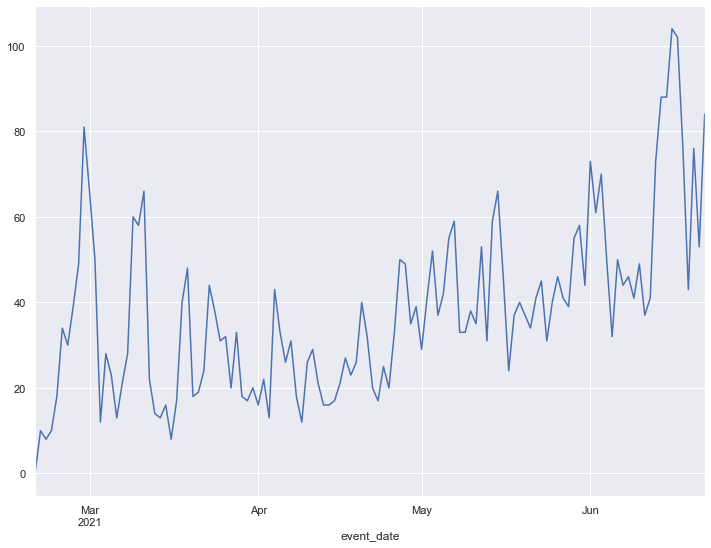

In [236]:
pr3["sold_count"].plot()

In [59]:
# category sold 
# basket count
# category favored 
# category visits "


In [62]:
X = pd.DataFrame(pr3["category_sold"])
X["Basket Count"] = pr3["basket_count"]
#X["Month"] = pr3["Month"]
X["Category Visits"] = pr3["category_visits"]
X["Category Favored"] = pr3["category_favored"]
#X["ratio"] = pr3["sold_count"]/pr3["favored_count"]
#X["Day"] = pr3["Day"]
#X["price"] = pr3["price"]
#X["Trend"] = pr3["trend"]
y = pr3["sold_count"]
#lag = pr3["sold_count"].shift(-1)
#X["lag"] = lag
#X["lag"].tail(1).fillna(X["lag"].mean(), inplace = True)
X = X.astype(float)
#X.drop(X.head(2).index, inplace = True)
X.head()

,category_sold,Basket Count,Category Visits,Category Favored
event_date,,,,
2021-06-24,5266.0,237.0,822760.0,65204.0
2021-06-23,5303.0,380.0,804508.0,62236.0
2021-06-22,4434.0,383.0,742698.0,58769.0
2021-06-21,5913.0,274.0,864722.0,73041.0
2021-06-20,7149.0,414.0,1173728.0,101322.0


In [61]:
pred = pd.DataFrame([np.mean(X["basket_count"][:5])])
pred.columns = ['basket_count']
pred.set_index(X.head(1).index  , inplace = True)
pred

KeyError: 'basket_count'

In [296]:
X = pd.concat([pred, X])
X

,basket_count
event_date,
2021-06-20,438.28
2021-06-20,426.40
2021-06-20,414.00
2021-06-19,260.00
2021-06-18,386.00
...,...
2021-02-23,139.00
2021-02-22,101.00
2021-02-21,63.00


In [63]:
y

event_date
2021-06-24    48
2021-06-23    87
2021-06-22    84
2021-06-21    53
2021-06-20    76
              ..
2021-02-23    18
2021-02-22    10
2021-02-21     8
2021-02-20    10
2021-02-19     0
Name: sold_count, Length: 126, dtype: int64

In [64]:
lm = sm.OLS(y.astype(float),X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sold_count   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              883.6
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                    4.99e-89
Time:                        10:59:45   Log-Likelihood:                         -439.97
No. Observations:                 126   AIC:                                      887.9
Df Residuals:                     122   BIC:                                      899.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
category_sold        0.0098      0.001      8.834      0.000       0.008       0.012
Basket Count         0.1169      0.007     15.805      0.000       0.102       0.132
Category Visits   2.031e-05   5.62e-06      3.616      0.000    9.19e-06    3.14e-05
Category Favored    -0.0006      0.000     -5.162      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        5.400   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.847
Skew:                           0.434   Prob(JB):                       0.0886
Kurtosis:                       3.411   Cond. No.                     4.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

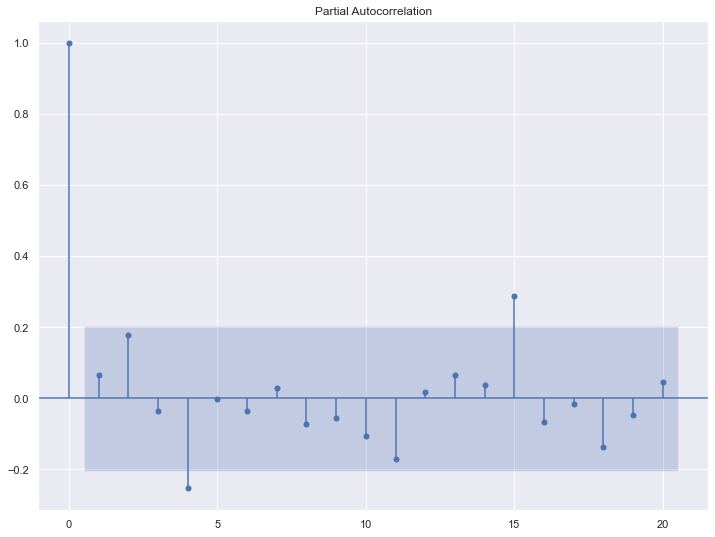

In [235]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(model.resid)
plt.show()

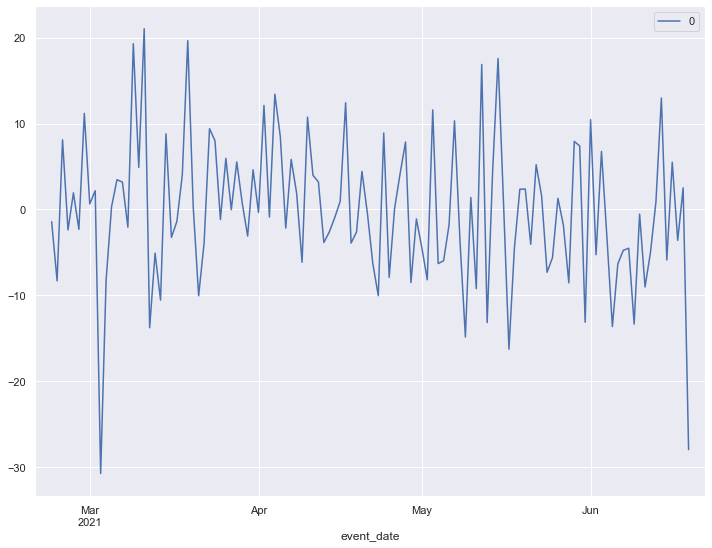

In [264]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

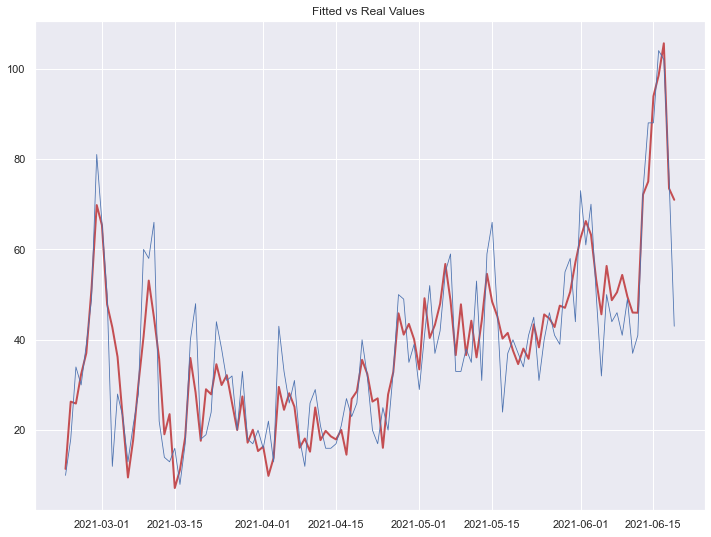

In [265]:
new_df = pd.DataFrame((model_fit.fittedvalues +  result.seasonal + result.trend),  index = model_fit.fittedvalues.index)
new_df.columns = ["Fitted"]
new_df["Real"] = random +   result.seasonal + result.trend
plt.plot(random.index,new_df.Fitted, c = "r",linewidth=2)
plt.plot(random.index,new_df.Real, c = "b", linewidth=0.8,)
plt.title("Fitted vs Real Values ")
plt.show()

In [ ]:
# category sold 
# basket count
# category favored 
# category visits "

In [67]:
prediction = pd.DataFrame([np.mean(X["category_sold"][:3])])
prediction.columns = ['category_sold']
prediction.set_index(X.head(1).index  , inplace = True)
prediction["Basket Count"] = np.mean(X["Basket Count"][:3])
prediction["Category Visits"] = np.mean(X["Category Visits"][:3])
prediction["Category Favored"] = np.mean(X["Category Favored"][:3])

#prediction["Trend"] = X["Trend"][0] + 1
#prediction["Month"] = 6.0
prediction

,category_sold,Basket Count,Category Visits,Category Favored
event_date,,,,
2021-06-24,5190.0,316.777778,805752.222222,63169.888889


In [68]:
X = pd.concat([prediction, X])
X.head()

,category_sold,Basket Count,Category Visits,Category Favored
event_date,,,,
2021-06-24,5190.0,316.777778,805752.222222,63169.888889
2021-06-24,5001.0,333.333333,789988.666667,62069.666667
2021-06-24,5266.0,237.000000,822760.000000,65204.000000
2021-06-23,5303.0,380.000000,804508.000000,62236.000000
2021-06-22,4434.0,383.000000,742698.000000,58769.000000


In [69]:
model.predict(X)

event_date
2021-06-24    67.412076
2021-06-24    67.814710
2021-06-24    57.983676
2021-06-23    76.437842
2021-06-22    69.022612
                ...    
2021-02-23    17.162256
2021-02-22    12.520762
2021-02-21     9.908859
2021-02-20     8.672180
2021-02-19     0.068070
Length: 128, dtype: float64